In [ ]:
import numpy as np
import os
from keras.models import load_model
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/'
dataset_dir= '/content/drive/MyDrive/cxr folder 700/'
print(os.listdir(base_dir))
print(os.listdir(dataset_dir))

['Getting started.pdf', 'WhatsApp Chat - ☁️☁️☁️☁️☁️.zip', 'cxr folder 700', 'tb_inc_mon.h5', 'tb_inc_700.h5', 'tuberculosis-chest-x-ray-inceptionv3.ipynb', 'Colab Notebooks']
['tb', 'normal']


In [ ]:
tuberculosis_data= dataset_dir + 'tb/'
print("tuberculosis images :\n" ,os.listdir(tuberculosis_data)[:5])

normal_data= dataset_dir + 'normal/'
print("\nnormal images :\n" ,os.listdir(normal_data)[:5])

tuberculosis images :
 ['Tuberculosis-133.png', 'Tuberculosis-1.png', 'Tuberculosis-104.png', 'Tuberculosis-159.png', 'Tuberculosis-115.png']

normal images :
 ['Normal-101.png', 'Normal-102.png', 'Normal-1.png', 'Normal-103.png', 'Normal-100.png']


In [ ]:
print("no. of tuberculosis images :" ,len(os.listdir(tuberculosis_data)))
print("\nno. of normal images :" ,len(os.listdir(normal_data)))

no. of tuberculosis images : 699

no. of normal images : 699


In [ ]:
print("no. of tuberculosis images :" ,len(os.listdir(tuberculosis_data)))
print("\nno. of normal images :" ,len(os.listdir(normal_data)))

In [ ]:
# generating training data
print("training data :")
train_datagen= ImageDataGenerator(rescale=1/255, zoom_range=0.3, rotation_range=50, width_shift_range= 0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest', validation_split = 0.2)

train_data = train_datagen.flow_from_directory(dataset_dir, 
                                              target_size= (256, 256),
                                              class_mode= "binary",
                                              batch_size=32,
                                              subset= "training"
                                              )

# genarating validation data
print("\nvalidation data :")
val_datagen= ImageDataGenerator(rescale= 1/255)

val_data= train_datagen.flow_from_directory(dataset_dir, 
                                              target_size= (256, 256),
                                              class_mode= "binary",
                                              batch_size=32,
                                              shuffle= False,
                                              subset= "validation"
                                              )

training data :
Found 1120 images belonging to 2 classes.

validation data :
Found 278 images belonging to 2 classes.


In [ ]:
#inception_model= InceptionV3(input_shape= (256, 256,3), include_top= False, weights='imagenet')

#last_output= inception_model.layers[-1].output


#last_output= Flatten()(last_output)


#pretrained_model= Model(inception_model.input, last_output)    

In [ ]:
# layer 1
#x= Dense(units=512, activation="relu")(last_output)
#x=Dropout(0.1)(x)

# layer 2
#x= Dense(units=128, activation="relu")(x)
#x=Dropout(0.1)(x)

# output layer
#x= Dense(units=1, activation="sigmoid")(x)

# final model
#model= Model(pretrained_model.input, x)

#model.summary()

In [ ]:
model = load_model(base_dir + 'tb_inc_mon.h5')

model.compile(loss= "binary_crossentropy", optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=["accuracy"])

callbacks = [
        EarlyStopping(patience=5, monitor='val_loss',mode = "min"),
        TensorBoard(log_dir='logs')]

model_checkpoint = ModelCheckpoint('tb_checkpoints.hdf5',
                                    monitor = 'val_accuracy',
                                    verbose = 1,
                                    save_best_only= True,
                                    mode= 'max')


history= model.fit(train_data,
                    steps_per_epoch= train_data.samples//train_data.batch_size,
                    validation_data= val_data,
                    validation_steps= val_data.samples//val_data.batch_size,
                    epochs= 10,
                    verbose=1,
                    callbacks = callbacks 
                   )

Epoch 1/10
35/35 [==============================] - 220s 6s/step - loss: 0.3753 - accuracy: 0.8446 - val_loss: 0.4628 - val_accuracy: 0.7969
Epoch 2/10
35/35 [==============================] - 41s 1s/step - loss: 0.3037 - accuracy: 0.8652 - val_loss: 0.3634 - val_accuracy: 0.8359
Epoch 3/10
35/35 [==============================] - 41s 1s/step - loss: 0.2610 - accuracy: 0.8804 - val_loss: 0.3520 - val_accuracy: 0.8477
Epoch 4/10
35/35 [==============================] - 38s 1s/step - loss: 0.2467 - accuracy: 0.8991 - val_loss: 0.2750 - val_accuracy: 0.8984
Epoch 5/10
35/35 [==============================] - 38s 1s/step - loss: 0.2215 - accuracy: 0.9009 - val_loss: 0.5417 - val_accuracy: 0.7812
Epoch 6/10
35/35 [==============================] - 38s 1s/step - loss: 0.2223 - accuracy: 0.9098 - val_loss: 0.4099 - val_accuracy: 0.8008
Epoch 7/10
35/35 [==============================] - 41s 1s/step - loss: 0.2197 - accuracy: 0.9125 - val_loss: 0.2679 - val_accuracy: 0.8672
Epoch 8/10
35/35 [=

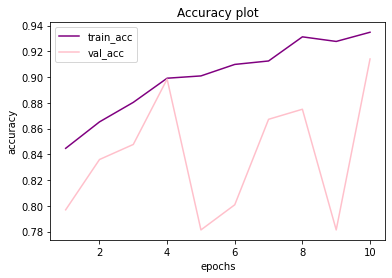

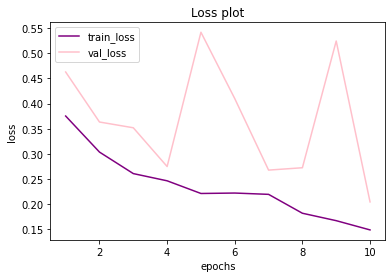

In [ ]:
import matplotlib.pyplot as plt
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [ ]:
prediction= model.predict(val_data, steps=np.ceil(val_data.samples/val_data.batch_size), verbose=1)
prediction= (prediction > 0.5)
#prediction

9/9 [==============================] - 11s 1s/step


In [ ]:
model.evaluate(val_data,verbose = 1)

9/9 [==============================] - 7s 764ms/step - loss: 0.2135 - accuracy: 0.9281


[0.21350398659706116, 0.9280575513839722]

In [ ]:
cm= confusion_matrix(val_data.classes, prediction)
#plot_confusion_matrix(cm, figsize=(5,5))

print(accuracy_score(val_data.classes, prediction))
print(classification_report(val_data.classes, prediction))

0.9316546762589928
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       139
           1       0.92      0.94      0.93       139

    accuracy                           0.93       278
   macro avg       0.93      0.93      0.93       278
weighted avg       0.93      0.93      0.93       278



In [ ]:
model.save("tb_inc_mon_retrained.h5")